In [11]:
import pandas as pd
# 读取文件
df = pd.read_csv('../data/各地区年平均收入.csv', encoding='gbk')
df


,dq,x1,x2,x3,x4,x5,x6,x7
0,北京,10907,8259,9917,12864,18058,14945,37096
1,上海,11733,7329,8746,12698,16857,14175,12720
2,广东,10032,6814,11036,12475,12410,11140,7713
3,浙江,8847,7026,7346,9356,10417,9500,8178
4,天津,8689,5083,5667,11829,11797,8950,5109
5,福建,7621,5582,11124,8556,8336,8732,7507
6,江苏,7745,5183,7390,9144,9153,7352,6864
7,西藏,10524,4588,5918,9558,7114,,6292
8,海南,5468,4208,7010,11062,9077,8373,8462
9,云南,7237,5473,5065,7710,8388,8109,11793


In [12]:
# 查找nan
print(df.isnull().sum())

# 查找空白
df.isin([' ', ''])

dq    0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64


,dq,x1,x2,x3,x4,x5,x6,x7
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [13]:
# 将空白值转换为NaN
for column in df.columns:
    if column == 'dq':
        continue
    if df[column].dtype == object:  # 检查列是否包含对象类型（包括空字符串）
        df[column] = pd.to_numeric(df[column], errors='coerce')  # 将列转换为数值类型，将无法转换的值置为NaN

# 使用平均值填充NaN值
df['x6'].fillna(df['x6'].mean(), inplace=True)
df['x7'].fillna(df['x7'].mean(), inplace=True)

In [14]:
from sklearn.preprocessing import StandardScaler
# 使用StandardScaler进行数据标准化
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.iloc[:, 1:])

# 更新DataFrame中的标准化数值
df.iloc[:, 1:] = scaled_values

# 打印标准化后的DataFrame
df

,dq,x1,x2,x3,x4,x5,x6,x7
0,北京,2.256660,2.821342,1.954717,2.196559,3.269498,3.129970,5.016933e+00
1,上海,2.723202,2.114824,1.392213,2.126891,2.857925,2.811951,9.729717e-01
2,广东,1.762442,1.723580,2.492242,2.033301,1.333976,1.558460,1.423139e-01
3,浙江,1.093129,1.884636,0.719706,0.724298,0.650992,0.881120,2.194571e-01
4,天津,1.003887,0.408545,-0.086822,1.762183,1.123906,0.653963,-2.896878e-01
5,福建,0.400658,0.787634,2.534514,0.388549,-0.062149,0.563927,1.081387e-01
6,江苏,0.470696,0.484515,0.740842,0.635324,0.217830,-0.006030,1.465444e-03
7,西藏,2.040334,0.032495,0.033749,0.809075,-0.480918,0.000000,-9.342895e-02
8,海南,-0.815401,-0.256189,0.558305,1.440283,0.191786,0.415655,2.665725e-01
9,云南,0.183767,0.704827,-0.375999,0.033494,-0.044329,0.306620,8.191830e-01


In [15]:
from sklearn.decomposition import PCA
import numpy as np

# 计算累积解释方差比例和重构误差
explained_variance_ratio = []
reconstruction_errors = []

for i in range(6):
    # 进行PCA降维处理
    pca = PCA(n_components=i + 1)  # 指定要降到的维数
    principal_components = pca.fit_transform(scaled_values)

    # 计算累积解释方差比例
    explained_variance_ratio.append(np.sum(pca.explained_variance_ratio_))

    # 计算重构误差（相对于原始数据）
    reconstructed_data = pca.inverse_transform(principal_components)
    reconstruction_error = np.mean(np.square(scaled_values - reconstructed_data))
    reconstruction_errors.append(reconstruction_error)

    # 创建新的DataFrame存储降维后的数据
    print(f"输出维数为{i+1}的数据：")
    df_pca = pd.DataFrame(data=principal_components, columns=["PC"+str(j+1) for j in range(i+1)])
    print(df_pca.to_markdown())
    print()

# 打印累积解释方差比例和重构误差
print("累积解释方差比例:")
print(explained_variance_ratio)
print()
print("重构误差:")
print(reconstruction_errors)


输出维数为1的数据：
|    |        PC1 |
|---:|-----------:|
|  0 |  7.73555   |
|  1 |  5.77195   |
|  2 |  4.18885   |
|  3 |  2.37971   |
|  4 |  1.80703   |
|  5 |  1.70979   |
|  6 |  0.947498  |
|  7 |  0.884336  |
|  8 |  0.666312  |
|  9 |  0.620285  |
| 10 |  0.0168581 |
| 11 | -0.462405  |
| 12 | -0.627707  |
| 13 | -0.689012  |
| 14 | -0.901569  |
| 15 | -1.00531   |
| 16 | -0.945876  |
| 17 | -1.14583   |
| 18 | -1.16894   |
| 19 | -1.21925   |
| 20 | -1.25976   |
| 21 | -1.45133   |
| 22 | -1.4869    |
| 23 | -1.49479   |
| 24 | -1.5433    |
| 25 | -1.58345   |
| 26 | -1.65275   |
| 27 | -1.88574   |
| 28 | -1.91146   |
| 29 | -2.01234   |
| 30 | -2.28044   |

输出维数为2的数据：
|    |        PC1 |        PC2 |
|---:|-----------:|-----------:|
|  0 |  7.73555   |  2.41223   |
|  1 |  5.77195   | -0.184137  |
|  2 |  4.18885   | -1.75825   |
|  3 |  2.37971   | -0.476763  |
|  4 |  1.80703   | -0.386783  |
|  5 |  1.70979   | -1.6175    |
|  6 |  0.947498  | -0.647052  |
|  7 |  0.884336  | 

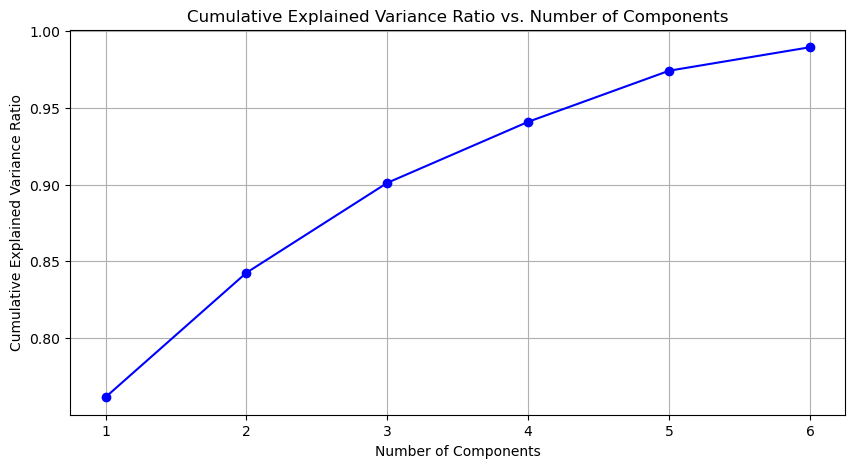

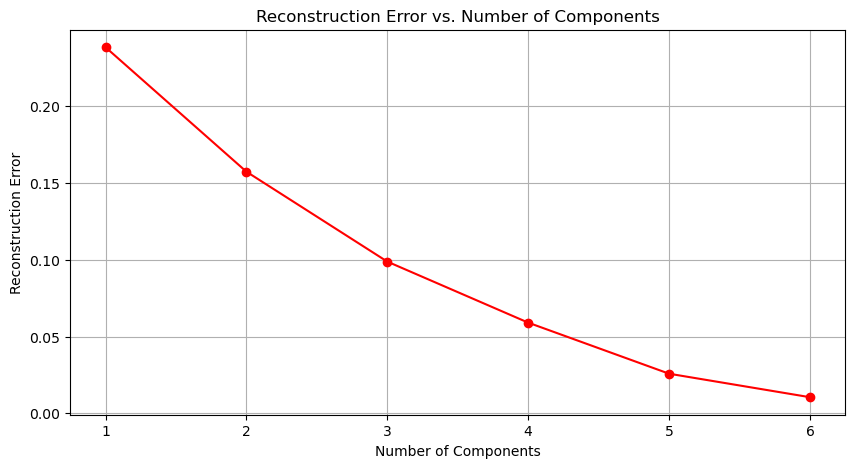

In [16]:
import matplotlib.pyplot as plt

# 绘制累积解释方差比例随维度变化的折线图
plt.figure(figsize=(10, 5))
plt.plot(range(1, 7), explained_variance_ratio, marker='o', color='b', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# 绘制重构误差随维度变化的折线图
plt.figure(figsize=(10, 5))
plt.plot(range(1, 7), reconstruction_errors, marker='o', color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components')
plt.grid(True)
plt.show()


评估降维效果的好坏通常要根据具体的应用场景和需求来定。以下是几种常见的评估指标：

累积解释方差比例（Cumulative Explained Variance Ratio）：该指标衡量了降维后的主成分能够解释原始数据方差的比例。通常希望累积解释方差比例越高越好，因为这意味着降维后保留了更多的原始数据信息。

重构误差（Reconstruction Error）：该指标衡量了降维后重构数据与原始数据之间的差异程度。对于使用PCA进行降维的情况，重构误差可以通过计算降维后的数据再逆转换回原始空间后与原始数据的差距来评估。通常情况下，重构误差越小越好，表示降维能够保持较好的数据还原能力。

应用任务的性能评估：如果你使用降维技术是为了在某个具体的应用任务中提升性能，例如分类、聚类等，那么最终的评估应该以应用任务的性能指标为准。你可以在降维后应用机器学习模型并评估其在测试数据上的性能，与不进行降维时的性能进行比较。

除了以上指标之外，还有其他一些评估方法和指标，如特征保留率、信息保持率等，可以根据具体情况选择适合的评估指标。

In [17]:
# 选维度为3
# 初始化 PCA 模型
pca = PCA(n_components=3)

# 对数据进行降维处理
principal_components = pca.fit_transform(scaled_values)
df_pca = pd.DataFrame(principal_components)
df_pca

,0,1,2
0,7.735548,2.412227,1.218650
1,5.771952,-0.184137,-1.168877
2,4.188850,-1.758250,-0.002115
3,2.379708,-0.476763,-0.396989
4,1.807033,-0.386783,-1.296451
5,1.709787,-1.617498,1.366447
6,0.947498,-0.647052,0.051317
7,0.884336,-0.611561,-1.183841
8,0.666312,-0.286025,0.604441
9,0.620285,0.751119,-0.015200


In [18]:
# 合并数据
df_combined = pd.concat([df, df_pca], axis=1)
df_combined

,dq,x1,x2,x3,x4,x5,x6,x7,0,1,2
0,北京,2.256660,2.821342,1.954717,2.196559,3.269498,3.129970,5.016933e+00,7.735548,2.412227,1.218650
1,上海,2.723202,2.114824,1.392213,2.126891,2.857925,2.811951,9.729717e-01,5.771952,-0.184137,-1.168877
2,广东,1.762442,1.723580,2.492242,2.033301,1.333976,1.558460,1.423139e-01,4.188850,-1.758250,-0.002115
3,浙江,1.093129,1.884636,0.719706,0.724298,0.650992,0.881120,2.194571e-01,2.379708,-0.476763,-0.396989
4,天津,1.003887,0.408545,-0.086822,1.762183,1.123906,0.653963,-2.896878e-01,1.807033,-0.386783,-1.296451
5,福建,0.400658,0.787634,2.534514,0.388549,-0.062149,0.563927,1.081387e-01,1.709787,-1.617498,1.366447
6,江苏,0.470696,0.484515,0.740842,0.635324,0.217830,-0.006030,1.465444e-03,0.947498,-0.647052,0.051317
7,西藏,2.040334,0.032495,0.033749,0.809075,-0.480918,0.000000,-9.342895e-02,0.884336,-0.611561,-1.183841
8,海南,-0.815401,-0.256189,0.558305,1.440283,0.191786,0.415655,2.665725e-01,0.666312,-0.286025,0.604441
9,云南,0.183767,0.704827,-0.375999,0.033494,-0.044329,0.306620,8.191830e-01,0.620285,0.751119,-0.015200
